# Program to determine the Season (BTC, ETH, ALT)

In [13]:
import pandas as pd
import numpy as np
import time
import random
import inspect
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
import matplotlib.patches as patches
from binance.client import Client
from binance_keys import api_key, secret_key
from datetime import date
from datetime import timedelta  
from datetime import datetime
from matplotlib.patches import FancyBboxPatch

In [14]:
rolling_window = 14
lookback = 98
datafile = 'df'+ f'{lookback}' + 'a'
file_generated = False
save_path = './Data/'

In [52]:
generate_new_file =False

print("Do you want to generate a new Data File? (yes= 1, no = 0):")
x = input()
if x == 1:
    generate_new_file = True
elif x == 0:  
    generate_new_file = False

In [16]:
client = Client(api_key, secret_key)

In [17]:
def getbtc():
    info = client.get_exchange_info()
    symbols = [x['symbol'] for x in info['symbols']]
    relevant=[symbol for symbol in symbols if symbol.endswith('BTC')]
    relevant.sort()
    relevant.extend(["BTCUSDT"])
    #relevant = relevant(columns=relevant.loc[:, "B":"D"].columns)
    return (relevant)

In [18]:
# reset df1
def resetdf():
    df1=pd.read_csv(save_path + f'{datafile}_analysis.csv')
    df1.Time = pd.to_datetime(df1.Time)
    first_column = df1.pop('BTCUSDT')
    time_column = df1.Time
    df1.insert(1, 'BTCUSDT', first_column)
    df1.columns=df1.columns.str.replace("BTC","")
    df1.columns=df1.columns.str.replace("USDT","BTCUSDT")
    df1 = df1.set_index('Time')
    return(df1)

In [19]:
def savedf():
    global generate_new_file
    dfs=makedf()
    mergeddf = pd.concat(dict(zip(relevant,dfs)), axis=1)
    closesdf = mergeddf.loc[:,mergeddf.columns.get_level_values(1).isin(['Close'])]
    closesdf.columns = closesdf.columns.droplevel(1)
    df1=closesdf.reset_index()
    df1.to_csv(save_path + f'{datafile}_analysis.csv', index=False)
    generate_new_file= False
    return(df1)

In [20]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol,'1d',f'{lookback+1} days ago UTC'))
    if len(frame)>0:
        frame = frame.iloc[:,:5]
        frame.columns = ['Time','Open','High','Low','Close']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index, unit='ms')
        frame = frame.astype(float)
        return frame

In [21]:
def makedf():
    dfs = []
    for coin in relevant:
        dfs.append(getdailydata(coin))
    return(dfs)

In [22]:
# Get all BTC trading pairs from Binance
relevant=getbtc()

### Start Program

In [23]:
# *************** Use to generate new data (DONT USE ALWAYS) ***************
if (generate_new_file):
    df=savedf()

In [24]:
df

,Time,1INCHBTC,AAVEBTC,ACABTC,ACHBTC,ACMBTC,ADABTC,ADXBTC,AERGOBTC,AGIXBTC,...,XVSBTC,YFIBTC,YFIIBTC,YGGBTC,YOYOBTC,ZECBTC,ZENBTC,ZILBTC,ZRXBTC,BTCUSDT
0,2021-11-13,0.000066,0.004852,NaN,NaN,0.000122,0.000032,0.000012,0.000005,0.000005,...,0.000387,0.5090,0.0640,0.000099,3.600000e-07,0.003091,0.001491,0.000002,0.000020,64380.00
1,2021-11-14,0.000065,0.004812,NaN,NaN,0.000122,0.000031,0.000012,0.000005,0.000005,...,0.000371,0.5128,0.0632,0.000096,3.700000e-07,0.003082,0.001465,0.000002,0.000019,65519.10
2,2021-11-15,0.000066,0.004739,NaN,NaN,0.000127,0.000032,0.000012,0.000005,0.000004,...,0.000388,0.5253,0.0646,0.000106,3.600000e-07,0.003073,0.001477,0.000002,0.000019,63606.74
3,2021-11-16,0.000064,0.004630,NaN,NaN,0.000127,0.000031,0.000013,0.000006,0.000004,...,0.000385,0.5103,0.0644,0.000103,3.500000e-07,0.002757,0.001396,0.000002,0.000019,60058.87
4,2021-11-17,0.000065,0.004712,NaN,NaN,0.000123,0.000031,0.000013,0.000006,0.000005,...,0.000387,0.5164,0.0641,0.000126,3.600000e-07,0.002640,0.001432,0.000002,0.000019,60344.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2022-02-15,0.000040,0.003870,0.000036,0.000001,0.000107,0.000025,0.000010,0.000005,0.000003,...,0.000222,0.5498,0.0526,0.000080,3.100000e-07,0.002826,0.000966,0.000001,0.000014,44544.86
95,2022-02-16,0.000041,0.003886,0.000035,0.000001,0.000110,0.000025,0.000010,0.000005,0.000003,...,0.000269,0.5397,0.0523,0.000079,3.000000e-07,0.002855,0.000924,0.000001,0.000015,43873.56
96,2022-02-17,0.000041,0.003775,0.000034,0.000001,0.000113,0.000025,0.000011,0.000005,0.000003,...,0.000282,0.5543,0.0517,0.000075,2.800000e-07,0.002801,0.000906,0.000001,0.000015,40515.70
97,2022-02-18,0.000040,0.003639,0.000035,0.000001,0.000118,0.000025,0.000010,0.000005,0.000003,...,0.000259,0.5497,0.0505,0.000073,2.800000e-07,0.002730,0.000926,0.000001,0.000015,39974.44


In [66]:
df=resetdf()
df.reset_index()
df.fillna(1, inplace=True)

In [67]:
df.head()

,BTCUSDT,1INCH,AAVE,ACA,ACH,ACM,ADA,ADX,AERGO,AGIX,...,XVG,XVS,YFI,YFII,YGG,YOYO,ZEC,ZEN,ZIL,ZRX
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-13,64380.00,0.000066,0.004852,1.0,1.0,0.000122,0.000032,0.000012,0.000005,0.000005,...,5.100000e-07,0.000387,0.5090,0.0640,0.000099,3.600000e-07,0.003091,0.001491,0.000002,0.000020
2021-11-14,65519.10,0.000065,0.004812,1.0,1.0,0.000122,0.000031,0.000012,0.000005,0.000005,...,4.600000e-07,0.000371,0.5128,0.0632,0.000096,3.700000e-07,0.003082,0.001465,0.000002,0.000019
2021-11-15,63606.74,0.000066,0.004739,1.0,1.0,0.000127,0.000032,0.000012,0.000005,0.000004,...,4.600000e-07,0.000388,0.5253,0.0646,0.000106,3.600000e-07,0.003073,0.001477,0.000002,0.000019
2021-11-16,60058.87,0.000064,0.004630,1.0,1.0,0.000127,0.000031,0.000013,0.000006,0.000004,...,4.500000e-07,0.000385,0.5103,0.0644,0.000103,3.500000e-07,0.002757,0.001396,0.000002,0.000019
2021-11-17,60344.87,0.000065,0.004712,1.0,1.0,0.000123,0.000031,0.000013,0.000006,0.000005,...,5.000000e-07,0.000387,0.5164,0.0641,0.000126,3.600000e-07,0.002640,0.001432,0.000002,0.000019


In [68]:
returns = np.log(df / df.shift(1)).dropna()
log_returns = np.log(returns+1)

In [69]:
log_returns

,BTCUSDT,1INCH,AAVE,ACA,ACH,ACM,ADA,ADX,AERGO,AGIX,...,XVG,XVS,YFI,YFII,YGG,YOYO,ZEC,ZEN,ZIL,ZRX
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-14,0.017387,-0.014670,-0.008313,0.000000,0.000000,-0.006574,-0.022802,-0.032182,-0.006550,-0.033339,...,-0.108905,-0.045065,0.007410,-0.012659,-0.026974,0.027030,-0.002920,-0.017748,-0.006410,-0.033339
2021-11-15,-0.030070,0.007282,-0.015405,0.000000,0.000000,0.044756,0.018595,0.014191,0.087764,-0.011236,...,0.000000,0.043863,0.023798,0.021674,0.091554,-0.027781,-0.002929,0.008125,0.018869,-0.011936
2021-11-16,-0.059107,-0.030810,-0.023544,0.000000,0.000000,-0.004732,-0.016662,0.087700,0.114898,-0.059558,...,-0.022224,-0.007798,-0.029399,-0.003106,-0.026115,-0.028575,-0.114862,-0.058055,-0.025809,-0.036029
2021-11-17,0.004739,0.016760,0.017403,0.000000,0.000000,-0.026724,-0.003537,-0.046231,0.047076,0.070857,...,0.100172,0.005172,0.011813,-0.004680,0.177725,0.027781,-0.044333,0.025142,0.025160,0.026691
2021-11-18,-0.060736,-0.042487,-0.020578,0.000000,0.000000,-0.013958,0.009870,-0.015373,-0.042044,-0.036705,...,-0.136775,-0.043175,0.095453,0.031727,0.146703,-0.058857,-0.013047,0.015131,-0.039226,-0.027423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,0.045114,0.012373,0.022741,0.057049,0.114075,-0.015844,0.008042,-0.002893,0.012346,-0.020907,...,0.037046,-0.013971,0.013096,0.026619,0.099671,0.032264,-0.002123,-0.004141,0.008696,0.029232
2022-02-16,-0.015301,0.016310,0.004117,-0.041405,0.039073,0.020093,-0.007699,0.000000,0.000000,-0.010564,...,-0.038471,0.175103,-0.018715,-0.005736,-0.016436,-0.033339,0.010158,-0.045470,0.008621,0.066326
2022-02-17,-0.082971,-0.003420,-0.029408,-0.025772,-0.015874,0.030120,0.019469,0.015195,-0.014614,0.010453,...,0.000000,0.047181,0.026343,-0.011606,-0.053287,-0.071488,-0.019280,-0.019869,-0.017545,-0.004569


In [70]:
dfbtc=log_returns.pop('BTCUSDT')
dfeth=log_returns.pop('ETH')
dfal=log_returns.copy()
dfalt=log_returns.mean(axis=1)
dfn=dfbtc.to_frame().join(dfeth)
dfn['ALT']=dfalt
dfn['Season'] = dfn.apply(lambda x: dfn.columns[x.argmax()], axis = 1)

In [73]:
dfal.head()

,1INCH,AAVE,ACA,ACH,ACM,ADA,ADX,AERGO,AGIX,AGLD,...,XVG,XVS,YFI,YFII,YGG,YOYO,ZEC,ZEN,ZIL,ZRX
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-14,-0.014670,-0.008313,0.0,0.0,-0.006574,-0.022802,-0.032182,-0.006550,-0.033339,-0.032573,...,-0.108905,-0.045065,0.007410,-0.012659,-0.026974,0.027030,-0.002920,-0.017748,-0.006410,-0.033339
2021-11-15,0.007282,-0.015405,0.0,0.0,0.044756,0.018595,0.014191,0.087764,-0.011236,0.016718,...,0.000000,0.043863,0.023798,0.021674,0.091554,-0.027781,-0.002929,0.008125,0.018869,-0.011936
2021-11-16,-0.030810,-0.023544,0.0,0.0,-0.004732,-0.016662,0.087700,0.114898,-0.059558,-0.111130,...,-0.022224,-0.007798,-0.029399,-0.003106,-0.026115,-0.028575,-0.114862,-0.058055,-0.025809,-0.036029
2021-11-17,0.016760,0.017403,0.0,0.0,-0.026724,-0.003537,-0.046231,0.047076,0.070857,0.026238,...,0.100172,0.005172,0.011813,-0.004680,0.177725,0.027781,-0.044333,0.025142,0.025160,0.026691
2021-11-18,-0.042487,-0.020578,0.0,0.0,-0.013958,0.009870,-0.015373,-0.042044,-0.036705,-0.023197,...,-0.136775,-0.043175,0.095453,0.031727,0.146703,-0.058857,-0.013047,0.015131,-0.039226,-0.027423


In [63]:
type(dfeth)

pandas.core.series.Series

In [64]:
log_returns

,1INCH,AAVE,ACA,ACH,ACM,ADA,ADX,AERGO,AGIX,AGLD,...,XVG,XVS,YFI,YFII,YGG,YOYO,ZEC,ZEN,ZIL,ZRX
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-14,-0.014670,-0.008313,0.000000,0.000000,-0.006574,-0.022802,-0.032182,-0.006550,-0.033339,-0.032573,...,-0.108905,-0.045065,0.007410,-0.012659,-0.026974,0.027030,-0.002920,-0.017748,-0.006410,-0.033339
2021-11-15,0.007282,-0.015405,0.000000,0.000000,0.044756,0.018595,0.014191,0.087764,-0.011236,0.016718,...,0.000000,0.043863,0.023798,0.021674,0.091554,-0.027781,-0.002929,0.008125,0.018869,-0.011936
2021-11-16,-0.030810,-0.023544,0.000000,0.000000,-0.004732,-0.016662,0.087700,0.114898,-0.059558,-0.111130,...,-0.022224,-0.007798,-0.029399,-0.003106,-0.026115,-0.028575,-0.114862,-0.058055,-0.025809,-0.036029
2021-11-17,0.016760,0.017403,0.000000,0.000000,-0.026724,-0.003537,-0.046231,0.047076,0.070857,0.026238,...,0.100172,0.005172,0.011813,-0.004680,0.177725,0.027781,-0.044333,0.025142,0.025160,0.026691
2021-11-18,-0.042487,-0.020578,0.000000,0.000000,-0.013958,0.009870,-0.015373,-0.042044,-0.036705,-0.023197,...,-0.136775,-0.043175,0.095453,0.031727,0.146703,-0.058857,-0.013047,0.015131,-0.039226,-0.027423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,0.012373,0.022741,0.057049,0.114075,-0.015844,0.008042,-0.002893,0.012346,-0.020907,0.027380,...,0.037046,-0.013971,0.013096,0.026619,0.099671,0.032264,-0.002123,-0.004141,0.008696,0.029232
2022-02-16,0.016310,0.004117,-0.041405,0.039073,0.020093,-0.007699,0.000000,0.000000,-0.010564,-0.052594,...,-0.038471,0.175103,-0.018715,-0.005736,-0.016436,-0.033339,0.010158,-0.045470,0.008621,0.066326
2022-02-17,-0.003420,-0.029408,-0.025772,-0.015874,0.030120,0.019469,0.015195,-0.014614,0.010453,0.025800,...,0.000000,0.047181,0.026343,-0.011606,-0.053287,-0.071488,-0.019280,-0.019869,-0.017545,-0.004569


<AxesSubplot:xlabel='Time'>

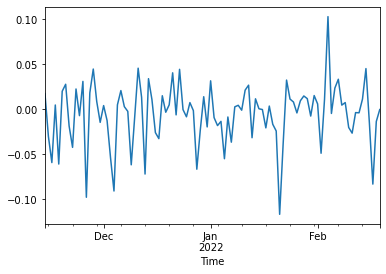

In [32]:
dfn.BTCUSDT.plot()


In [33]:
dfn=dfn.rolling(window=rolling_window, min_periods=1).sum(inplace=True)
dfn['Season'] = dfn.apply(lambda x: dfn.columns[x.argmax()], axis = 1)

<AxesSubplot:xlabel='Time'>

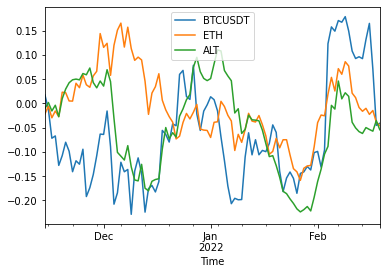

In [34]:
dfn.plot()

In [35]:
timeplot=dfn[dfn['Season'] != dfn['Season'].shift(1)].index.tolist()

In [36]:
timeplot

[Timestamp('2021-11-14 00:00:00'),
 Timestamp('2021-11-15 00:00:00'),
 Timestamp('2021-11-18 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-28 00:00:00'),
 Timestamp('2021-12-22 00:00:00'),
 Timestamp('2021-12-26 00:00:00'),
 Timestamp('2021-12-27 00:00:00'),
 Timestamp('2021-12-28 00:00:00'),
 Timestamp('2022-01-12 00:00:00'),
 Timestamp('2022-01-13 00:00:00'),
 Timestamp('2022-01-15 00:00:00'),
 Timestamp('2022-01-18 00:00:00'),
 Timestamp('2022-01-21 00:00:00'),
 Timestamp('2022-01-27 00:00:00'),
 Timestamp('2022-01-28 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-02-19 00:00:00')]

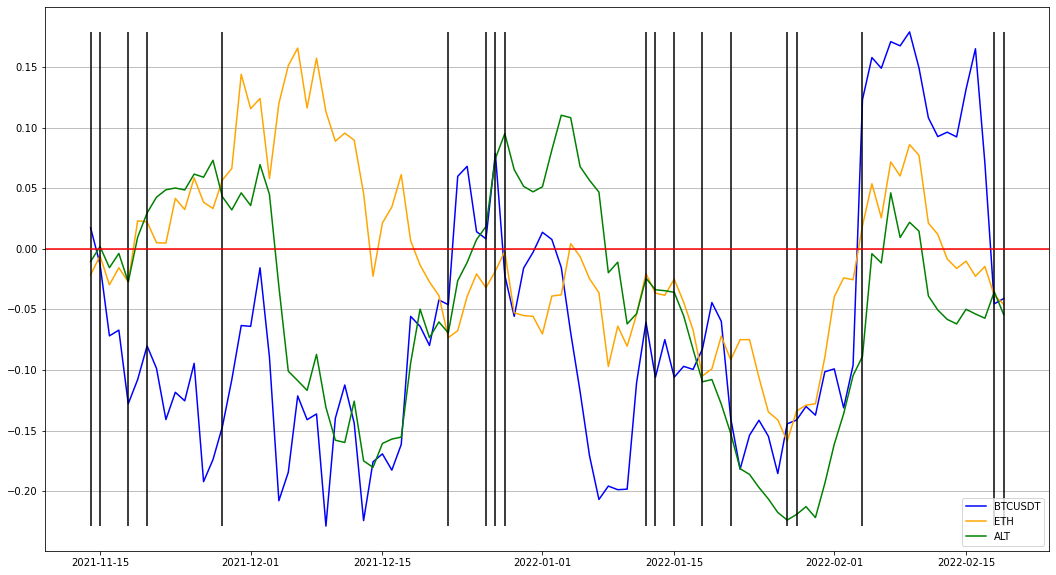

In [37]:
plt.figure(figsize = (18, 10))
plt.plot(dfn['BTCUSDT'], 'blue')
plt.plot(dfn['ETH'], 'orange')
plt.plot(dfn['ALT'],'green')
plt.legend(['BTCUSDT','ETH','ALT'],loc ="lower right")
plt.vlines(x = timeplot, ymin = dfn.min()[0:3].min(), ymax = dfn.max()[0:3].max(),colors = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(axis ='y')

plt.show()

In [38]:
dfb=[]

In [39]:
dfb=pd.read_csv(save_path + f'{datafile}_analysis.csv')
dfb.Time = pd.to_datetime(dfb.Time)
first_column = dfb.pop('BTCUSDT')
time_column = dfb.Time
dfb.insert(1, 'BTCUSDT', first_column)
dfb.columns=dfb.columns.str.replace("BTC ","")
#dfb.columns=dfb.columns.str.replace("USDT","BTCUSDT")
dfb = dfb.set_index('Time')

In [40]:
dfb.head()

,BTCUSDT,1INCHBTC,AAVEBTC,ACABTC,ACHBTC,ACMBTC,ADABTC,ADXBTC,AERGOBTC,AGIXBTC,...,XVGBTC,XVSBTC,YFIBTC,YFIIBTC,YGGBTC,YOYOBTC,ZECBTC,ZENBTC,ZILBTC,ZRXBTC
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-13,64380.00,0.000066,0.004852,NaN,NaN,0.000122,0.000032,0.000012,0.000005,0.000005,...,5.100000e-07,0.000387,0.5090,0.0640,0.000099,3.600000e-07,0.003091,0.001491,0.000002,0.000020
2021-11-14,65519.10,0.000065,0.004812,NaN,NaN,0.000122,0.000031,0.000012,0.000005,0.000005,...,4.600000e-07,0.000371,0.5128,0.0632,0.000096,3.700000e-07,0.003082,0.001465,0.000002,0.000019
2021-11-15,63606.74,0.000066,0.004739,NaN,NaN,0.000127,0.000032,0.000012,0.000005,0.000004,...,4.600000e-07,0.000388,0.5253,0.0646,0.000106,3.600000e-07,0.003073,0.001477,0.000002,0.000019
2021-11-16,60058.87,0.000064,0.004630,NaN,NaN,0.000127,0.000031,0.000013,0.000006,0.000004,...,4.500000e-07,0.000385,0.5103,0.0644,0.000103,3.500000e-07,0.002757,0.001396,0.000002,0.000019
2021-11-17,60344.87,0.000065,0.004712,NaN,NaN,0.000123,0.000031,0.000013,0.000006,0.000005,...,5.000000e-07,0.000387,0.5164,0.0641,0.000126,3.600000e-07,0.002640,0.001432,0.000002,0.000019


In [41]:
dfb.min()[:1]

BTCUSDT    35071.42
dtype: float64

In [42]:
dfb.min()[0:1].min()

35071.42

In [43]:
dfb.max()[0:1].max()

65519.1

In [44]:
plt.figure(figsize = (18, 10))

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

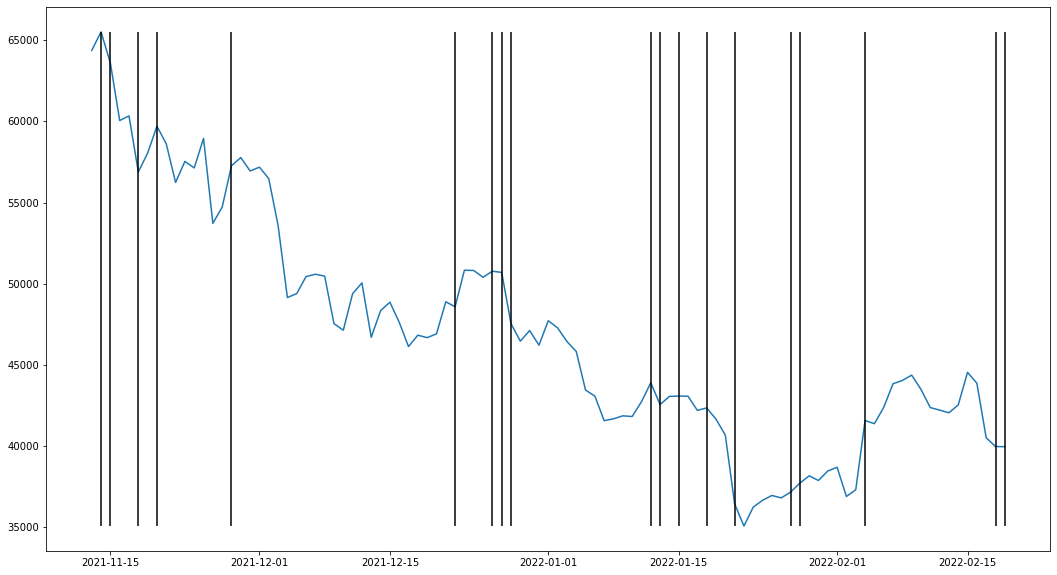

In [45]:

plt.figure(figsize = (18, 10))
plt.plot(dfb['BTCUSDT'])
plt.vlines(x = timeplot, ymin = dfb.min()[0:1].min(), ymax = dfb.max()[0:1].max(),colors = 'black')

In [46]:
dfn.tail(50)

,BTCUSDT,ETH,ALT,Season
Time,,,,
2022-01-01,0.013644,-0.070205,0.051187,ALT
2022-01-02,0.007696,-0.038957,0.081530,ALT
2022-01-03,-0.015357,-0.037899,0.110185,ALT
2022-01-04,-0.069179,0.004268,0.108148,ALT
2022-01-05,-0.117791,-0.006399,0.067813,ALT
2022-01-06,-0.170636,-0.024657,0.056527,ALT
2022-01-07,-0.206742,-0.036202,0.046770,ALT
2022-01-08,-0.195684,-0.097049,-0.019726,ALT
2022-01-09,-0.198670,-0.063769,-0.010988,ALT


In [47]:
dfn['Max']=dfn.iloc[:,:3].max(axis=1)

In [48]:
dfn.iloc[:,:3]

,BTCUSDT,ETH,ALT
Time,,,
2021-11-14,0.017387,-0.021470,-0.010440
2021-11-15,-0.012683,-0.005774,0.001842
2021-11-16,-0.071790,-0.029668,-0.015562
2021-11-17,-0.067051,-0.015596,-0.003802
2021-11-18,-0.127786,-0.027270,-0.027369
...,...,...,...
2022-02-15,0.131554,-0.010174,-0.049856
2022-02-16,0.165009,-0.022603,-0.053738
2022-02-17,0.070909,-0.014580,-0.057239


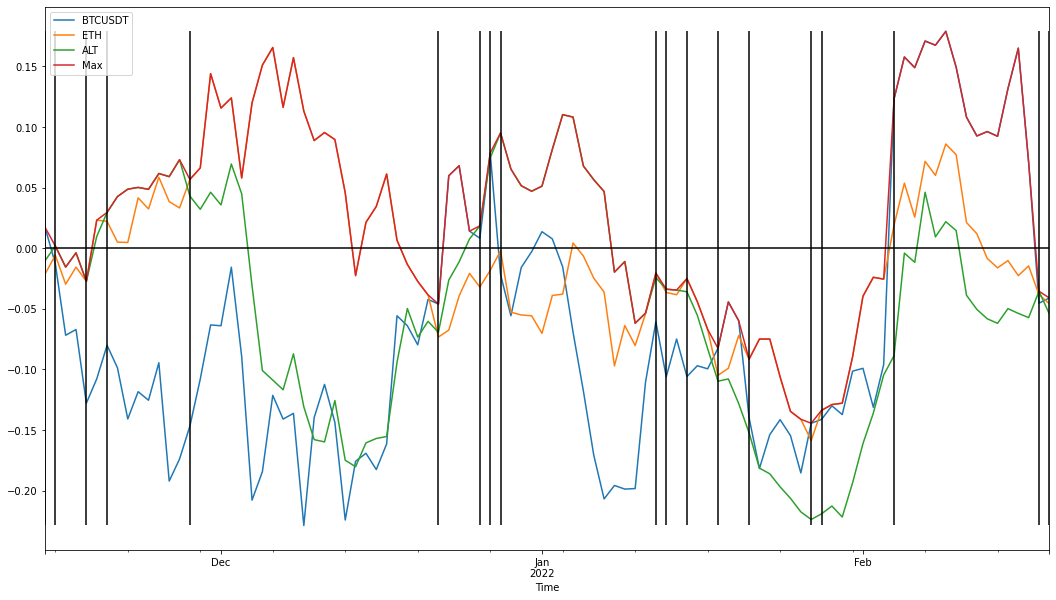

In [49]:
dfn.plot(figsize=(18,10))
plt.vlines(x = timeplot, ymin = dfn.min()[0:3].min(), ymax = dfn.max()[0:3].max(),colors = 'black')
plt.axhline(y=0, color='black', linestyle='-')

In [50]:
dfn = dfn[['BTCUSDT', 'ETH', 'ALT',  'Max', 'Season']]

In [51]:
dfn.tail()

,BTCUSDT,ETH,ALT,Max,Season
Time,,,,,
2022-02-15,0.131554,-0.010174,-0.049856,0.131554,BTCUSDT
2022-02-16,0.165009,-0.022603,-0.053738,0.165009,BTCUSDT
2022-02-17,0.070909,-0.014580,-0.057239,0.070909,BTCUSDT
2022-02-18,-0.045348,-0.038433,-0.035456,-0.035456,ALT
2022-02-19,-0.041012,-0.045704,-0.054270,-0.041012,BTCUSDT
